In [1]:
# Edwin Peter
# epeter@itam.mx

# Importing the libraries
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('regLin.csv')
X = dataset[dataset.columns[0:-1]]
Y = dataset[dataset.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75)


In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print(regressor.intercept_, regressor.coef_)

(2.2855463447501627, array([ 0.61008597]))


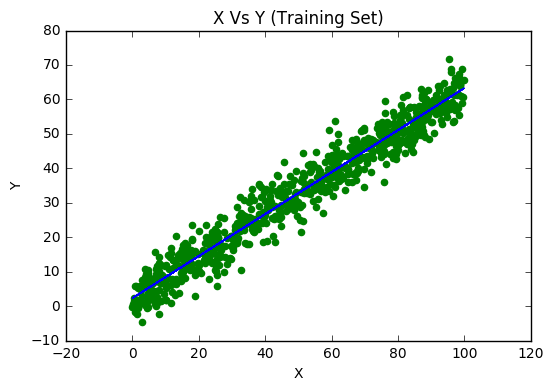

In [3]:
#Training Set Regression
plt.scatter(X_train, Y_train, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('X Vs Y (Training Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

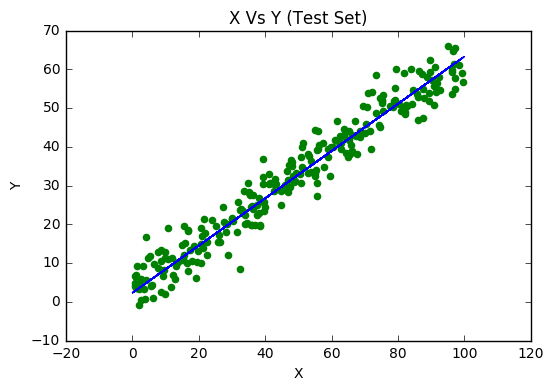

In [4]:
#Test Set Regression
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('X Vs Y (Test Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
np.mean(regressor.predict(X_test) - Y_test) **2

0.15629712755648836

In [6]:
print(regressor.intercept_)
print(regressor.coef_)

2.28554634475
[ 0.61008597]


In [7]:
w = np.linspace(-regressor.intercept_, regressor.intercept_ * 3, num=100)

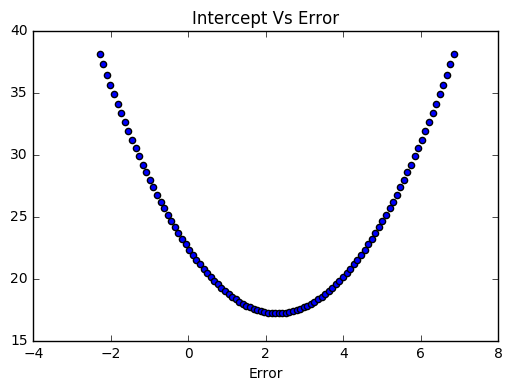

In [8]:
m = regressor.coef_[0]
b = regressor.intercept_

def computeErrorForLineGivenPoints(b, m, X,Y):
    indices = X.index.values
    totalError = 0
    for i in range(0, len(indices)):
        index = indices[i]
        x = X['X'][index]
        y = Y[index]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(X))

df = pd.DataFrame()

for i in range(0, len(w)):
    x = computeErrorForLineGivenPoints(w[i], m, X_train, Y_train)
    df = df.append({'int': w[i], 'error': x}, ignore_index=True)
    


plt.scatter(df['int'], df['error'])
plt.title('Intercept Vs Error')
plt.xlabel('Error')
plt.ylabel('')
plt.show()

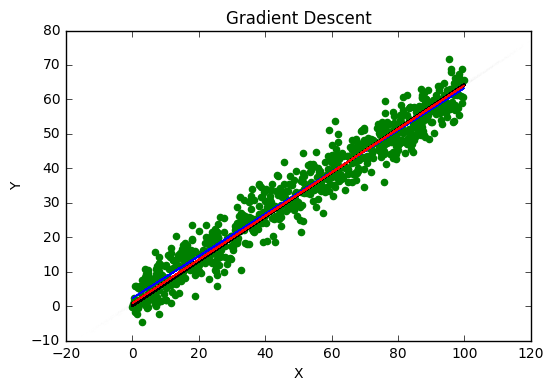

In [24]:
### Gradient Descent

def gradientDescent(b_current, m_current, dataset, learning_rate):
    b = 0
    m = 0
    N = float(len(dataset))
    for i in range(0, len(dataset)):
        x = dataset['X'][i]
        y = dataset['y'][i]
        b += -(2/N) * (y - ((m_current * x) + b_current))
        m += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b)
    new_m = m_current - (learning_rate * m)
    return [new_b, new_m]


b = 0
m = 1
learningrate = 0.00015
lowesterror = 1000000
iterations = 5000

for i in range(iterations):
    b,m = gradientDescent(b,m,dataset,learningrate)
    plt.plot(X_train, X_train * m + b, color='black')
    error = computeErrorForLineGivenPoints(b,m,X_train,Y_train)
    if(error<lowesterror):
        lowesterror = error
    
plt.scatter(X_train, Y_train, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')

#Gradient Descent Optimized
plt.plot(X_train, X_train * m + b, color='red')


plt.show()